<a href="https://colab.research.google.com/github/Fasiloc/Mathematics_learn-repo/blob/main/Classes/Day_6_Matrix_decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spectral Theory
## Motivation
In this session, we are going to introduce you the eigenvalues and eigenvectors which play a very important role in many applications in science and engineering. The prefix eigen- is adopted from the German word eigen for “proper”, “characteristic” and it may sound really abstract and scary at beginning. But when you start to understand them, you will find that they bring in a lot of insights and conveniences into our problems.

They have many applications, to name a few, finding the natural frequencies and mode shapes in dynamics systems, solving differential equations (we will see in later sessions), reducing the dimensions using principal components analysis, getting the principal stresses in the mechanics, and so on. Even the famous Google’s search engine algorithm - PageRank, uses the eigenvalues and eigenvectors to assign scores to the pages and rank them in the search.

This session teaches you how to use some common ways to find the eigenvalues and eigenvectors. By the end of this session you should understand the power method, the QR method and how to use Python to find them.

### The motivation behind eigen values and eigen vectors in linear algebra

The motivation behind the eigenvalues and eigenvectors is that, it helps us to understand the characteristics of the linear transformation, thus make things easy. We know that a vector x can be transformed to a different vector by multiplying  with  the Matrix $A$. The effect of the transformation represents a scale of the length of the vector and/or the rotate of the vector. The above equation points out that for some vectors, the effect of transformation of $Ax$ is only scale (stretching, compressing, and flipping). The eigenvectors are the vectors have this property and the eigenvalues λ′s are the scale factors. Let’s look at the following example.

>Goal: Plot the vector `x = [[1], [1]]` and the vector `b=Ax`, where `A = [[2, 0], [0, 1]]`


In [ ]:
import matplotlib.pyplot as plt# for plotting purpose
plt.style.use('seaborn-poster')
%matplotlib inline
def plot_vect(x, b, xlim, ylim):## definition of plotting function
    '''
    function to plot two vectors, 
    x - the original vector
    b - the transformed vector
    xlim - the limit for x
    ylim - the limit for y
    '''
    plt.figure(figsize = (10, 6))
    plt.quiver(0,0,x[0],x[1],\
        color='k',angles='xy',\
        scale_units='xy',scale=1,\
        label='Original vector')
    plt.quiver(0,0,b[0],b[1],\
        color='g',angles='xy',\
        scale_units='xy',scale=1,\
        label ='Transformed vector')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

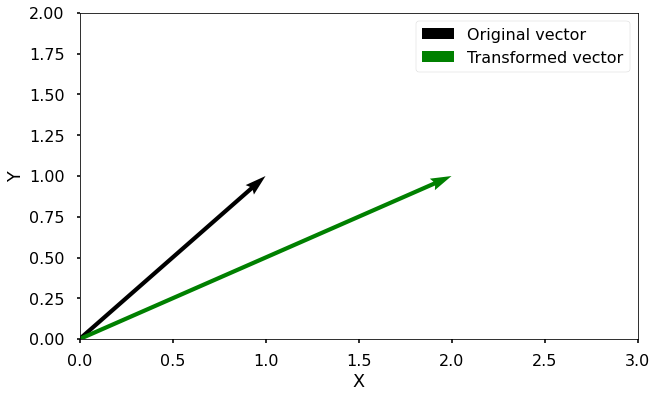

In [ ]:
import numpy as np
A = np.array([[2, 0],[0, 1]])
x = np.array([[1],[1]])
b = np.dot(A, x)
plot_vect(x,b,(0,3),(0,2))

We can see from the generated figure that the original vector x is rotated and stretched longer after transformed by A. Let’s try to do the same exercise with a different vector `[[1], [0]]`

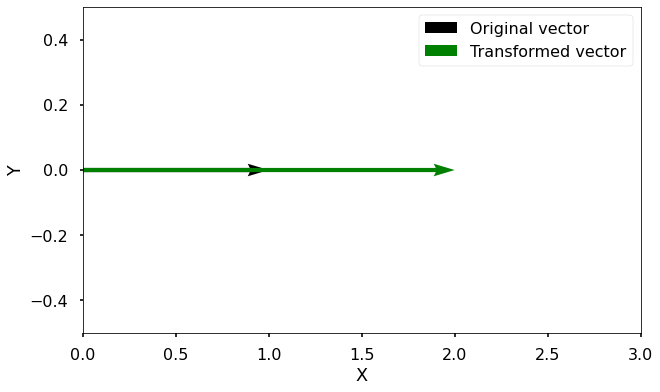

In [ ]:
x = np.array([[1], [0]])
b = np.dot(A, x)
plot_vect(x,b,(0,3),(-0.5,0.5))

Now we can see that with this new vector, the only thing changed after the transformation is the length of the vector, it is stretched. The new vector is `[[2], [0]]`, therefore, the transform is $$Ax=2x$$ Hence the vector `[[1],[0]]` is an eigen vector. Now try the vector `[[0],[1]]`.

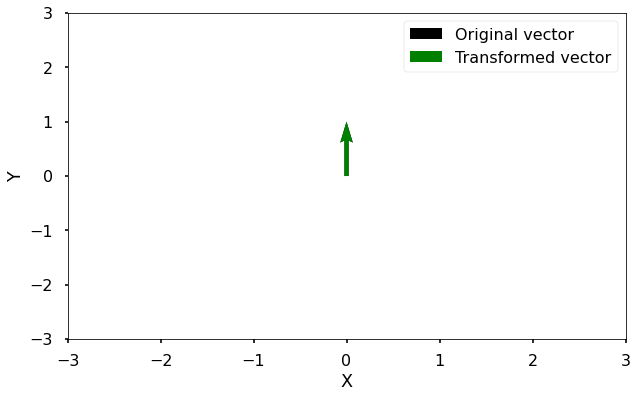

In [ ]:
x = np.array([[0], [1]])
b = np.dot(A, x)
plot_vect(x,b,(-3,3),(-3,3))

## Eigen values and eigen vectors in Python

> Calculation of the eigenvalues and eigenvectors in Python is fairly easy. The main built-in function in `python` to solve the eigenvalue/eigen vector problem for a square array is the `eig` function in `numpy.linalg`. Let’s see how we can use it.
1. **Question:** Find the eigen values and eigen vectors of $A = \begin{bmatrix}
2 & 2 & 4\\
1 & 3 & 5\\
2 & 3 & 4\\
\end{bmatrix}$. 

In [ ]:
import numpy.linalg as la
a = np.array([[2, 2, 4], 
              [1, 3, 5],
              [2, 3, 4]])
eval,evec=la.eig(a)
modal=evec.T.reshape(3,3)
print('E-value:', eval)
print('E-vectors:\n', evec)
print("Modal matrix:\n ", evec.T.reshape(3,3))

E-value: [ 8.80916362  0.92620912 -0.73537273]
E-vectors:
 [[-0.52799324 -0.77557092 -0.36272811]
 [-0.604391    0.62277013 -0.7103262 ]
 [-0.59660259 -0.10318482  0.60321224]]
Modal matrix:
  [[-0.52799324 -0.604391   -0.59660259]
 [-0.77557092  0.62277013 -0.10318482]
 [-0.36272811 -0.7103262   0.60321224]]


In [ ]:
import numpy.linalg as la
a = np.array([[-1, 2, 2], 
              [1, 2, 1],
              [-1, -1, 0]])
eval,evec=la.eig(a)
modal=evec.T.reshape(3,3)
print('E-value:', eval)
print('E-vectors:\n', evec)
print("Modal matrix:\n ", evec.T.reshape(3,3))

E-value: [-1.+0.00000000e+00j  1.+2.98536863e-08j  1.-2.98536863e-08j]
E-vectors:
 [[-8.16496581e-01+0.0000000e+00j  1.81298661e-16+1.0554872e-08j
   1.81298661e-16-1.0554872e-08j]
 [ 4.08248290e-01+0.0000000e+00j  7.07106781e-01+0.0000000e+00j
   7.07106781e-01-0.0000000e+00j]
 [-4.08248290e-01+0.0000000e+00j -7.07106781e-01+1.0554872e-08j
  -7.07106781e-01-1.0554872e-08j]]
Modal matrix:
  [[-8.16496581e-01+0.0000000e+00j  4.08248290e-01+0.0000000e+00j
  -4.08248290e-01+0.0000000e+00j]
 [ 1.81298661e-16+1.0554872e-08j  7.07106781e-01+0.0000000e+00j
  -7.07106781e-01+1.0554872e-08j]
 [ 1.81298661e-16-1.0554872e-08j  7.07106781e-01-0.0000000e+00j
  -7.07106781e-01-1.0554872e-08j]]


In [ ]:
import numpy.linalg as la
a = np.array([[1, 6, 1], 
              [1, 2, 0],
              [0, 0, 3]])
eval,evec=la.eig(a)
modal=evec.T.reshape(3,3)
print('E-value:', eval)
print('E-vectors:\n', evec)
print("Modal matrix:\n ", evec.T.reshape(3,3))

E-value: [-1.  4.  3.]
E-vectors:
 [[-0.9486833  -0.89442719 -0.23570226]
 [ 0.31622777 -0.4472136  -0.23570226]
 [ 0.          0.          0.94280904]]
Modal matrix:
  [[-0.9486833   0.31622777  0.        ]
 [-0.89442719 -0.4472136   0.        ]
 [-0.23570226 -0.23570226  0.94280904]]


In [ ]:
import numpy.linalg as la
a = np.array([[-1, 1, 2], 
              [0, -2, 1],
              [0, 0, -3]])
eval,evec=la.eig(a)
modal=evec.T.reshape(3,3)
print('E-value:', eval)
print('E-vectors:\n', evec)
print("Modal matrix:\n ", evec.T.reshape(3,3))

E-value: [-1. -2. -3.]
E-vectors:
 [[ 1.         -0.70710678 -0.33333333]
 [ 0.          0.70710678 -0.66666667]
 [ 0.          0.          0.66666667]]
Modal matrix:
  [[ 1.          0.          0.        ]
 [-0.70710678  0.70710678  0.        ]
 [-0.33333333 -0.66666667  0.66666667]]


In [ ]:
import numpy.linalg as la
a = np.array([[8, -6, 2], 
              [-6, 7, -4],
              [2, -4, 4]])
eval,evec=la.eig(a)
modal=evec.T.reshape(3,3)
print('E-value:', eval)
print('E-vectors:\n', evec)
print("Modal matrix:\n ", evec.T.reshape(3,3))

E-value: [15.11897155  3.50344549  0.37758295]
E-vectors:
 [[-0.65861492  0.62677662  0.4163862 ]
 [ 0.66250957  0.22061772  0.71582742]
 [-0.35680171 -0.74731446  0.56054763]]
Modal matrix:
  [[-0.65861492  0.66250957 -0.35680171]
 [ 0.62677662  0.22061772 -0.74731446]
 [ 0.4163862   0.71582742  0.56054763]]


In [ ]:
import numpy.linalg as la
a = np.array([[1, 2, -2], 
              [-1, 3, 0],
              [0, -2, 1]])
eval,evec=la.eig(a)
modal=evec.T.reshape(3,3)
print('E-value:', eval)
print('E-vectors:\n', evec)
print("Modal matrix:\n ", evec.T.reshape(3,3))

E-value: [2.4406197+1.56961032j 2.4406197-1.56961032j 0.1187606+0.j        ]
E-vectors:
 [[-0.77208278+0.j         -0.77208278-0.j          0.75789789+0.j        ]
 [-0.15554655-0.43646062j -0.15554655+0.43646062j  0.26304579+0.j        ]
 [ 0.40059228+0.16947392j  0.40059228-0.16947392j  0.59699053+0.j        ]]
Modal matrix:
  [[-0.77208278+0.j         -0.15554655-0.43646062j  0.40059228+0.16947392j]
 [-0.77208278-0.j         -0.15554655+0.43646062j  0.40059228-0.16947392j]
 [ 0.75789789+0.j          0.26304579+0.j          0.59699053+0.j        ]]


## LU decomposition 
Matrix decompositions are an important step in solving linear systems in a computationally efficient manner.

LU stands for ‘Lower Upper’, and so an LU decomposition of a matrix A is a decomposition so that

$$A=LU$$
where $L$ is lower triangular and $U$ is upper triangular.

Now, $LU$ decomposition is essentially gaussian elimination, but we work only with the matrix $A$ (as opposed to the augmented matrix).

Let’s review how gaussian elimination (ge) works. We will deal with a 3×3 system of equations for conciseness, but everything here generalizes to the n×n case. Consider the following equation:

$$\begin{split}\left(\begin{matrix}a_{11}&a_{12} & a_{13}\\a_{21}&a_{22}&a_{23}\\a_{31}&a_{32}&a_{33}\end{matrix}\right)\left(\begin{matrix}x_1\\x_2\\x_3\end{matrix}\right) = \left(\begin{matrix}b_1\\b_2\\b_3\end{matrix}\right)\end{split}$$
For simplicity, let us assume that the leftmost matrix A is non-singular. To solve the system using ge, we start with the ‘augmented matrix’:

$$\begin{split}\left(\begin{array}{ccc|c}a_{11}&a_{12} & a_{13}& b_1 \\a_{21}&a_{22}&a_{23}&b_2\\a_{31}&a_{32}&a_{33}&b_3\end{array}\right)\end{split}$$

We begin at the first entry, $a_{11}$. If $a_{11}\neq 0$, then we divide the first row by $a_{11}$ and then subtract the appropriate multiple of the first row from each of the other rows, zeroing out the first entry of all rows. (If $a_{11}$ is zero, we need to permute rows. We will not go into detail of that here.) The result is as follows:

$$\begin{split}\left(\begin{array}{ccc|c}
1 & \frac{a_{12}}{a_{11}} & \frac{a_{13}}{a_{11}} & \frac{b_1}{a_{11}} \\
0 & a_{22} - a_{21}\frac{a_{12}}{a_{11}} & a_{23} - a_{21}\frac{a_{13}}{a_{11}}  & b_2 - a_{21}\frac{b_1}{a_{11}}\\
0&a_{32}-a_{31}\frac{a_{12}}{a_{11}} & a_{33} - a_{31}\frac{a_{13}}{a_{11}}  &b_3- a_{31}\frac{b_1}{a_{11}}\end{array}\right)\end{split}$$

We repeat the procedure for the second row, first dividing by the leading entry, then subtracting the appropriate multiple of the resulting row from each of the third and first rows, so that the second entry in row 1 and in row 3 are zero. We could continue until the matrix on the left is the identity.

In that case, we can then just ‘read off’ the solution: i.e., the vector x is the resulting column vector on the right. Usually, it is more efficient to stop at reduced row eschelon form (upper triangular, with ones on the diagonal), and then use back substitution to obtain the final answer.

Now, this is all fine when we are solving a system one time, for one outcome b. Many applications involve solutions to multiple problems, where the left-hand-side of our matrix equation does not change, but there are many outcome vectors b. In this case, it is more efficient to decompose A.

First, we start just as in ge, but we ‘keep track’ of the various multiples required to eliminate entries.

We can solve the system by solving two back-substitution problems:

$$Ly = b$$

and
$$Ux=y$$

These are both $O(n^2)$, so it is more efficient to decompose when there are multiple outcomes to solve for.

For example, consider the matrix

$$\begin{split}A = \left(\begin{matrix} 1 & 3 & 4 \\2& 1& 3\\
4&1&2
\end{matrix}\right)\end{split}$$

We need to multiply row 1 by 2 and subtract from row 2 to eliminate the first entry in row 2, and then multiply row 1 by 4 and subtract from row 3. Instead of entering zeroes into the first entries of rows 2 and 3, we record the multiples required for their elimination, as so:

$$\begin{pmatrix} 1 & 3 & 4 \\
(2)& -5 & -5\\
(4)&-11&-14
 \end{pmatrix}$$

And then we eliminate the second entry in the third row:
 $$\begin{split}\left(\begin{matrix} 1 & 3 & 4 \\
  (2)& -5 & -5\\
  (4)&(\frac{11}{5})&-3
\end{matrix}\right)\end{split}$$

And now we have the decomposition:
 $$ \begin{split}L= \left(\begin{matrix} 1 & 0 & 0 \\
 2& 1 & 0\\
4&\frac{11}5&1
\end{matrix}\right)
U = \left(\begin{matrix} 1 & 3 & 4 \\
0& -5 & -5\\
0&0&-3
\end{matrix}\right)\end{split}$$

In [ ]:
import scipy.linalg as la
np.set_printoptions(suppress=True)

A = np.array([[1,3,4],[2,1,3],[4,1,2]])

print(A)

P, L, U = la.lu(A)
print(np.dot(P.T, A))
print
print(np.dot(L, U))
print("Pivoting matrix:\n",P)
print("Left lower triangular matrix:\n L=",L)
print("Right upper triangular matrix:\n U=",U)


[[1 3 4]
 [2 1 3]
 [4 1 2]]
[[4. 1. 2.]
 [1. 3. 4.]
 [2. 1. 3.]]
[[4. 1. 2.]
 [1. 3. 4.]
 [2. 1. 3.]]
Pivoting matrix:
 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
Left lower triangular matrix:
 L= [[1.         0.         0.        ]
 [0.25       1.         0.        ]
 [0.5        0.18181818 1.        ]]
Right upper triangular matrix:
 U= [[4.         1.         2.        ]
 [0.         2.75       3.5       ]
 [0.         0.         1.36363636]]


image Resolution: (4333, 3250)
(4333, 4333) (3250,) (3250, 3250)


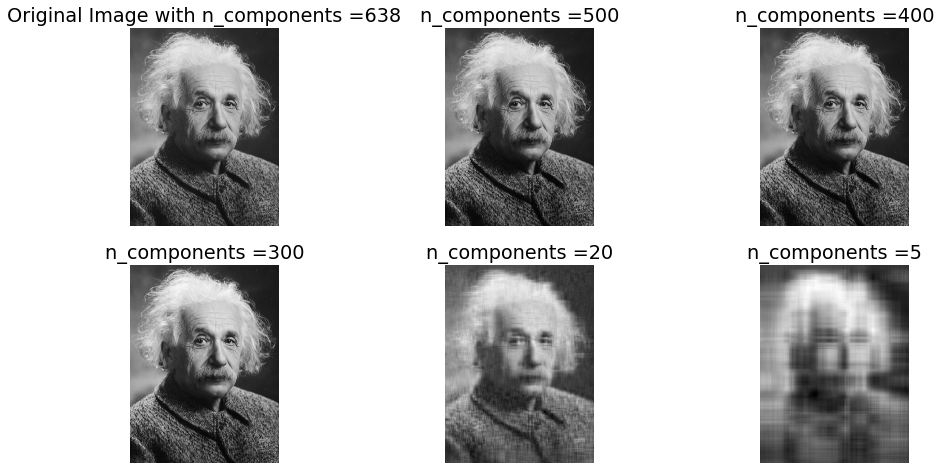

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
# read image in grayscale
img = cv2.imread('albert_einstein.jpg', 0)
print("image Resolution:",img.shape)
# obtain svd
U, S, V = np.linalg.svd(img)
# inspect shapes of the matrices
print(U.shape, S.shape, V.shape)

# plot images with different number of components
comps = [638, 500, 400, 300, 20, 5]

plt.figure(figsize = (16, 8))

for i in range(6):
  low_rank = U[:, :comps[i]] @ np.diag(S[:comps[i]]) @ V[:comps[i], :]
  if(i  == 0):
     plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("Original Image with n_components =" + str(comps[i]))
  else:
     plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("n_components =" + str(comps[i]))